In [18]:
# import libraries
import pandas as pd
import numpy as np 

# import matplotlib.pylab as plt
# import seaborn as sns

In [21]:
pd.__version__

AttributeError: module 'pandas' has no attribute '__version__'

#  Questions:
- <b>Ammar  :</b> 
- <b>Ismail :</b>
- <b>Nasibah:</b>
- <b>Wejdan :</b>
- <b>Yousif :</b> What is the monthly average dep delay?


In [57]:
flight_df = pd.read_csv("data/flights.csv")
flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [58]:
sum(flight_df.duplicated())

0

In [61]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    # summary['Uniques'] = df.nunique().values
    return summary


resumetable(flight_df)

Dataset Shape: (336776, 19)


,Name,dtypes,Missing
0,year,int64,0
1,month,int64,0
2,day,int64,0
3,dep_time,float64,8255
4,sched_dep_time,int64,0
5,dep_delay,float64,8255
6,arr_time,float64,8713
7,sched_arr_time,int64,0
8,arr_delay,float64,9430
9,carrier,object,0


In [4]:
flight_df.shape # (336776, 19)

(336776, 19)

In [62]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [7]:
flight_df['time_hour'] = pd.to_datetime(flight_df['time_hour'])

In [9]:
flight_df['day_name'] =  flight_df['time_hour'].dt.day_name()

In [63]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [64]:
flight_df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


## Null values

In [65]:
flight_df.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [66]:
sns.heatmap(flight_df.corr())

ImportError: cannot import name 'FuncType' from 'pandas._typing' (/Users/wbagais/opt/anaconda3/lib/python3.8/site-packages/pandas/_typing.py)

Text(0, 0.5, 'dep delay')

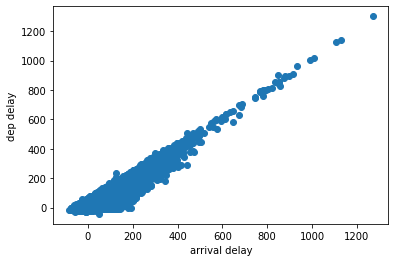

In [17]:
plt.scatter(flight_df['arr_delay'], flight_df['dep_delay'])
plt.xlabel("arrival delay")
plt.ylabel("dep delay")
plt.title("")

<AxesSubplot:>

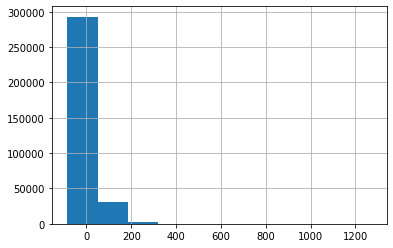

In [20]:
flight_df['arr_delay'].hist()

<AxesSubplot:>

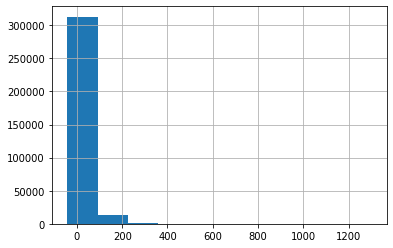

In [21]:
flight_df['dep_delay'].hist()

In [11]:
day_sum = flight_df.groupby(['day_name']).sum()
day_sum
# plt.hist(flight_df['time_hour'].dt.day_name(), flight_df['dep_delay'])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
day_name,,,,,,,,,,,,,,
Friday,101270004,328782,775908,65727315.0,67649580,715698.0,72826289.0,77191194,440182.0,100247140,7262353.0,51990701,663343,1315280
Monday,102038970,337312,785697,66661562.0,68050403,731114.0,73902795.0,77768583,475939.0,101250430,7429392.0,52334286,667290,1321403
Saturday,77943360,253282,617475,49925148.0,50728410,290130.0,56434960.0,58293264,-54757.0,71006261,5822127.0,41859435,497001,1028310
Sunday,93316641,307732,726912,63566422.0,64391677,528981.0,69767451.0,73207540,219340.0,90518821,6918051.0,48905052,631491,1242577
Thursday,101090847,324608,810085,65524788.0,67315211,785758.0,72531871.0,76949709,568784.0,99990143,7273104.0,51870897,660036,1311611
Tuesday,101499486,330137,786635,66152527.0,67400703,523823.0,74127461.0,77160413,264776.0,100755391,7349336.0,51798930,660885,1312203
Wednesday,100770780,323528,788304,65653187.0,67176784,576696.0,73177842.0,76845282,342910.0,100328363,7272247.0,51458306,658745,1302284


<BarContainer object of 7 artists>

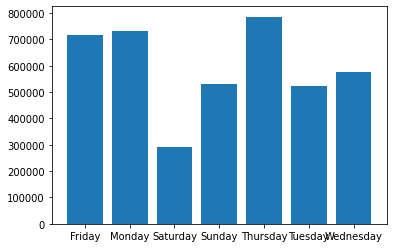

In [12]:
plt.bar(day_sum.index, day_sum['dep_delay'])
plt.xlabel("Day of the week")
plt.ylabel("Dep delay")
plt.xticks()

In [21]:
from plotnine import *

# What is the monthly average departure delay?

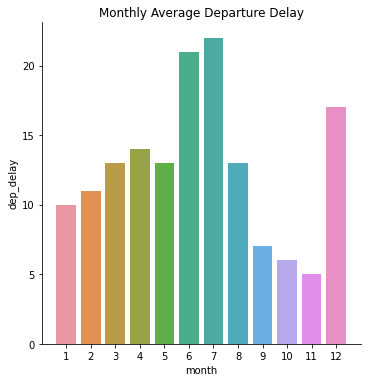

In [42]:
monthly_delay = flight_df.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()